# Pandas tutorial

This notebook uses examples from the official [Pandas: Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

## Load the libraries that you plan to use

It's good practice in a notebook to always load the libraries at the top of the notebook that you plan to use throughout the notebook. This preps the reader to understand what to expect in terms of commands and outputs. It also ensures that all the required functions and commands are available in the code cells, since you've loaded them into the computer's memory as the first set of instructions in the notebook.

This notebook will use [`pandas`](https://pandas.pydata.org/) and [`matplotlib`](https://matplotlib.org/), which are two very popular libraries to analyze and visualize data respectively. It will also use [`numpy`](https://numpy.org/) for calculating some values, and [`seaboarn`](https://seaborn.pydata.org/) for some of the visualizations.

Run the cell below to load all the libraries for this notebook.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load your data

You should store your data on the same server as your notebook whenever possible. Comma Separated Values (or `csv`) files are a very common format for storing Table-like information. The `read_csv` function in the `pandas` library, which the code above has shorted to `pd` when running `pandas` functions, can read in a `csv` file if you pass the function a string that contains the location of the file.

For example, the `pd.read_csv` command in the cell below will look in the `data` folder found next to this notebook, and load the file named `penguins.csv` as a dataframe named `penguins`.

In [2]:
penguins = pd.read_csv("penguins.csv", encoding='utf-8')

You can take a look at the first few rows of the dataframe by calling its named, followed by `.head()`. Running the cell below will show you the first 5 rows of data, as well as the corresponding column labels.

In [3]:
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


This data is about the Palmer Penguins

![](https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png)

Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).


The data set contains measurements on over 300 penguins, including their species, the island they were found on, the length and depth of their bills, the length of their flipper, their weight, their sex, and the year they were measured.

![](https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png)

For more information, you can visit [palmerpenguins by Allison Horst](https://allisonhorst.github.io/palmerpenguins/), who also made the images in this notebook.

## Selecting columns

Once you have your data loaded, you can start to create subsets of that data set for analysis. 

For example, the following command will create a new data frame `island` which only contains the column labeled `"island"` from the `penguins` dataframe.

In [31]:
island = penguins[["island"]]
island.head()

hey


,rowid,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,340,Chinstrap,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,50.8,19.0,210.0,4100.0,male,2009


And the following command will create a new dataframe named `mass_sex` which only keeps the columns related to the body mass and sex of the penguins.

In [5]:
mass_sex = penguins[["body_mass_g", "sex"]]
mass_sex.head()

,body_mass_g,sex
0,3750.0,male
1,3800.0,female
2,3250.0,female
3,NaN,NaN
4,3450.0,female


## Selecting rows

You can also filter your dataframe to only include certain observations that meet particular criteria. Here are some common things you might want to do with this data set.

### Select rows if a column contains a specific categorical value

For example, the following command will only keep rows that are about male penguins.

In [6]:
male_penguins = penguins[ penguins["sex"] == "male" ]
male_penguins

# Write a line of code that selects records for penguins that live on either Dream or Biscoe island 
# and store it in a variable called select_penguins. 
'''
print ()
select_penguins = penguins[ ( penguins["island"] == "Dream" ) | ( penguins["island"] =="Biscoe" )]
select_penguins 
'''


'\nprint ()\nselect_penguins = penguins[ ( penguins["island"] == "Dream" ) | ( penguins["island"] =="Biscoe" )]\nselect_penguins \n'

### Select rows if a column contains one of several categorical values

You can select rows that have multiple categorical values. In this example, we are keeping only penguins that were measured in 2008 and 2009.

In [7]:
recent_penguins = penguins[ penguins["year"].isin([2008, 2009]) ]
recent_penguins

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
50,51,Adelie,Biscoe,39.6,17.7,186.0,3500.0,female,2008
51,52,Adelie,Biscoe,40.1,18.9,188.0,4300.0,male,2008
52,53,Adelie,Biscoe,35.0,17.9,190.0,3450.0,female,2008
53,54,Adelie,Biscoe,42.0,19.5,200.0,4050.0,male,2008
54,55,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [8]:
# Same as above, just written differently
recent_penguins = penguins[(penguins["year"] == 2008) | (penguins["year"] == 2009)]
recent_penguins

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
50,51,Adelie,Biscoe,39.6,17.7,186.0,3500.0,female,2008
51,52,Adelie,Biscoe,40.1,18.9,188.0,4300.0,male,2008
52,53,Adelie,Biscoe,35.0,17.9,190.0,3450.0,female,2008
53,54,Adelie,Biscoe,42.0,19.5,200.0,4050.0,male,2008
54,55,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Select only rows for which a value is known (discard NA)

A lot of time datasets are missing values for certain observations. To discard rows for which a particular column is missing data, you can use the `.notna()` command.

In [9]:
has_bill_length = penguins[penguins["bill_length_mm"].notna()]
has_bill_length

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### I want to select rows and columns based off of their index (row and column number)

When you create a dataframe, `pandas` will by default assign each row and column a number called an index. This is different than the `rowid` that came with this specific data set. You should already know how to pick a row based off of the `rowid` column using commands further up in this notebook. 

To use the indices provided by `pandas` to select rows 9 - 25 and columns 2-5, you can use the following command.

In [24]:
print(penguins.iloc[9:25, 2:5])

'''
Write a line of code that selects rows 150-160 of the recordset. 

penguins.iloc[150:161]
'''

       island  bill_length_mm  bill_depth_mm
9   Torgersen            42.0           20.2
10  Torgersen            37.8           17.1
11  Torgersen            37.8           17.3
12  Torgersen            41.1           17.6
13  Torgersen            38.6           21.2
14  Torgersen            34.6           21.1
15  Torgersen            36.6           17.8
16  Torgersen            38.7           19.0
17  Torgersen            42.5           20.7
18  Torgersen            34.4           18.4
19  Torgersen            46.0           21.5
20     Biscoe            37.8           18.3
21     Biscoe            37.7           18.7
22     Biscoe            35.9           19.2
23     Biscoe            38.2           18.1
24     Biscoe            38.8           17.2


'\nWrite a line of code that selects rows 150-160 of the recordset. \n\npenguins.iloc[150:161]\n'

**Note:** `pandas` will *include* the first index value, but *not include* the second index value in the selected rows and columns returned. For example, the row with index 25 and the column with index 5 are not included in this subset of data.

### Sort by a column or columns

You can sort your dataframe by specifying the column or columns that you wish to sort by.

For example, to sort by flipper length you can use the following command.

In [11]:
penguins.sort_values(by='flipper_length_mm')

'''
Write a line of code that sorts the penguins dataframe by year.
penguins.sort_values(by='year')
'''



"\nWrite a line of code that sorts the penguins dataframe by year.\npenguins.sort_values(by='year')\n"

You can see the default behavior is to sort from smallest to largest, but you can change that by including an optional, `ascending=False` argument to the `sort_values()` method as shown below.

In [12]:
penguins.sort_values(by='flipper_length_mm', ascending=False)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
215,216,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,male,2008
217,218,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,male,2008
185,186,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male,2007
227,228,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,male,2008
241,242,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,male,2009
...,...,...,...,...,...,...,...,...,...
122,123,Adelie,Torgersen,40.2,17.0,176.0,3450.0,female,2009
20,21,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female,2007
28,29,Adelie,Biscoe,37.9,18.6,172.0,3150.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007


And to sort by more than one column, you can run the following command.

In [13]:
# First, only keep the rows where a value for sex is defined, then sort
penguins[penguins['sex'].notna()].sort_values(by=['sex', 'd'])

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
28,29,Adelie,Biscoe,37.9,18.6,172.0,3150.0,female,2007
20,21,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female,2007
122,123,Adelie,Torgersen,40.2,17.0,176.0,3450.0,female,2009
30,31,Adelie,Dream,39.5,16.7,178.0,3250.0,female,2007
98,99,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
...,...,...,...,...,...,...,...,...,...
227,228,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,male,2008
241,242,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,male,2009
265,266,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,male,2009
267,268,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,male,2009


## Calculating values from the dataframe

Now that you can wrangle the data in your dataframe a bit to create the perfect subset of data for analysis, you'll want to know how to crunch some important numbers. Suppose you wanted to compute the mean weight for male penguins and compare that to female penguins. 

First, create a dataframe with only male penguins in it, and then use the `np.mean()` function on just the column of data that contains the mass of the penguins. The commands would look like those below.

In [29]:
# subset the original data
male_penguins = penguins[ penguins["sex"] == "male" ]

# compute the mean value for the specified column
np.mean( male_penguins["body_mass_g"] )


AttributeError: 'Series' object has no attribute 'details'

In [15]:
# subset the original data
female_penguins = penguins[ penguins["sex"] == "female" ]

# compute the mean value for the specified column
np.mean( female_penguins["body_mass_g"] )

3862.2727272727275

Of course, you can do more than just compute a mean. Numpy has a whole slew of functions that you can call onto an array of values (or as we may call them, columns in a table). For a full reference of available `numpy` functions, see [Numpy Quickstart](https://numpy.org/doc/stable/user/quickstart.html).

Some common functions to analyze numerical columns of data are:
* `np.max()`. Returns the largest value in the column.
* `np.min()`. Returns the smallest value in the column.
* `np.median`. Returns the median value in the column.
* `np.mean()`. Returns the mean value in the column.
* `np.std()`. Returns the standard deviation of the values in the column.

## Visualizing Data

Of course, you might be interested in visualizing some of the data in your data frame. We'll take a look at a few common visualizations to highlight the necessary `pandas` commands.

### Scatter plot

You can call the `plot` command on a dataframe. You'll need to specify "scatter" as the `kind` argument, the columns you wish to use as the `x` and `y` arguments to construct the plot. Then, call `plt.show()` to render the graph in the notebook. In this example, the optional argument `alpha` is set to 0.5 to give each point a little transparency to help see overlapping points a bit clearer.

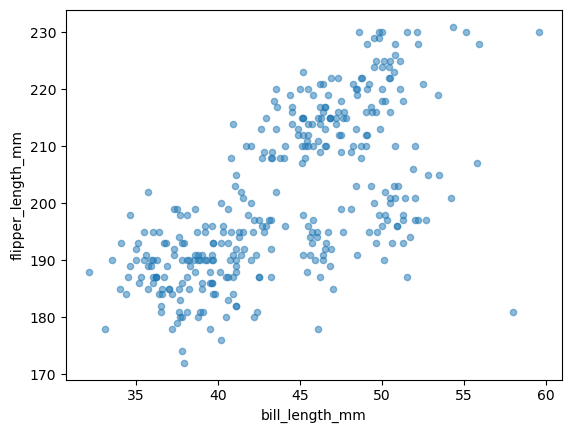

In [16]:
penguins.plot(kind='scatter', x='bill_length_mm', y="flipper_length_mm", alpha=0.5)
plt.show()

If you want to color code by categorical variable, it is actually a little bit easier to use a different visualization library, called [`seaborn`](https://seaborn.pydata.org/) because its scatterplot function allows you to specify the categorical variable column with the `hue` argument. You can create a similar effect using `pandas` but the approach is a bit more complicated.

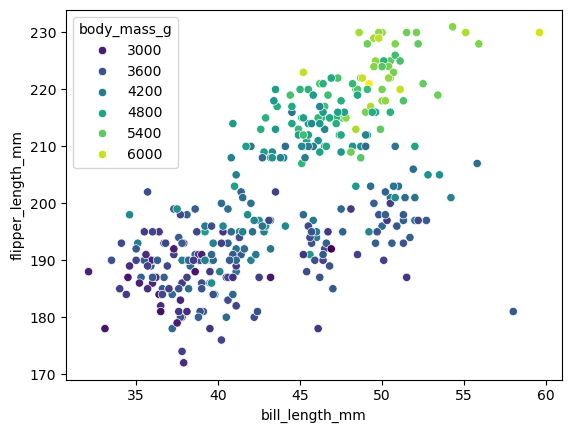

In [17]:
# penguins[["body_mass_g"]].truncate
sns.scatterplot(data=penguins, x='bill_length_mm', y="flipper_length_mm", hue='body_mass_g', palette="viridis")
plt.show()

### Box plots

You can create a box plot by specifying the column that contains the numerical data using the `column` argument, and the column that contains the categorical variable you want to group by using the `by` argument.

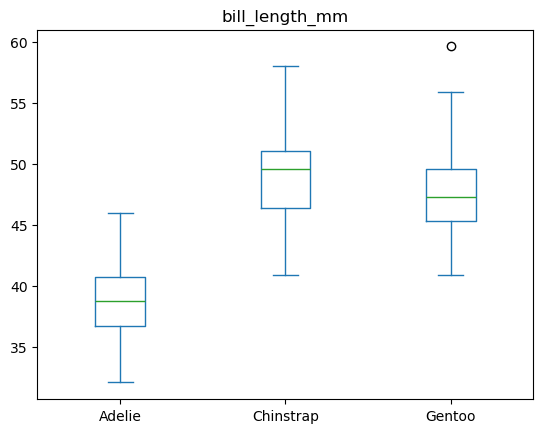

In [18]:
penguins.plot(kind="box", column="bill_length_mm", by="species")
plt.show()

### Histograms

You can specify the bins for your histogram by either creating an array that contains the edges of each bin. The `np.arange()` function lets you create an array with a specified starting and ending values, as well as the size of the increment to use to get from the the starting value to the ending value.

For example:

```python
np.arrange(6, 15, 3)
```

Would create an array that contains, 6, 9, and 12, since the command said to start at 6, end at 15, counting by 3. You don't include the ending value in the array.

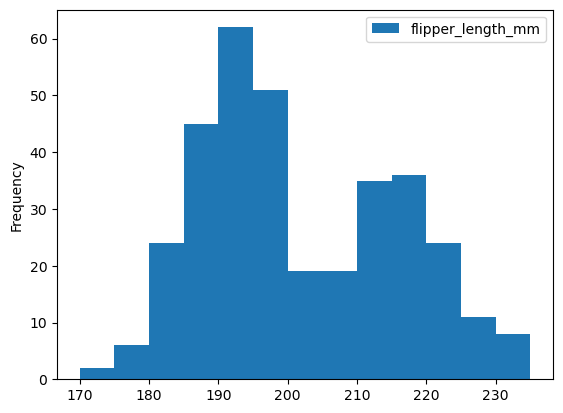

In [19]:
penguins.plot(kind="hist", column="flipper_length_mm", bins=np.arange(170,240,5))
plt.show()

For comparison sake, here's the same histogram made with `seaborn`.

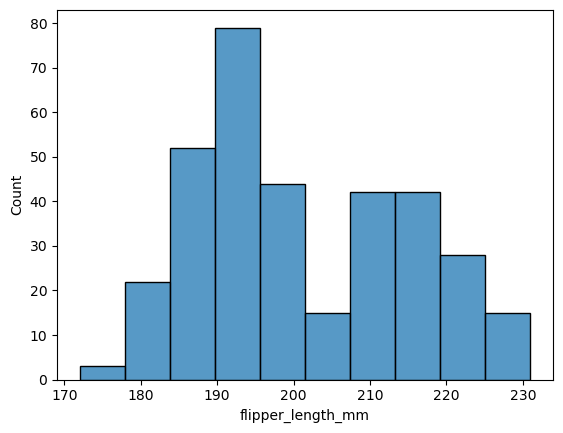

In [20]:
sns.histplot(data=penguins, x="flipper_length_mm")
plt.show()

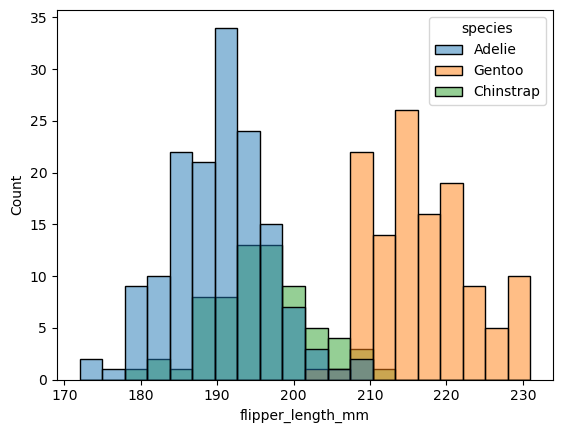

In [21]:
sns.histplot(data=penguins, x="flipper_length_mm", hue='species', bins=20)
plt.show()

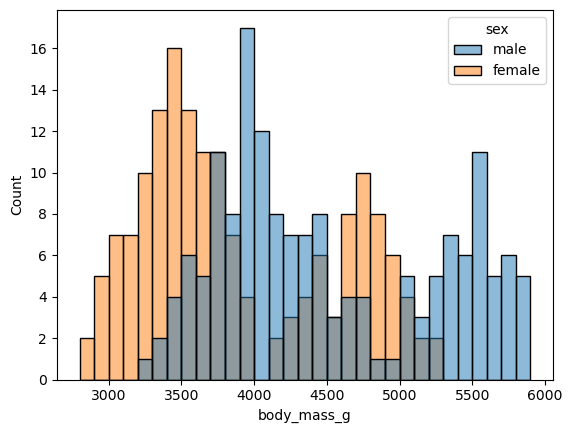

In [22]:
sns.histplot(data=penguins, x="body_mass_g", hue='sex', bins=np.arange(2800,6000,100))
plt.show()